[[587  19]
 [  2 490]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       606
           1       0.96      1.00      0.98       492

    accuracy                           0.98      1098
   macro avg       0.98      0.98      0.98      1098
weighted avg       0.98      0.98      0.98      1098



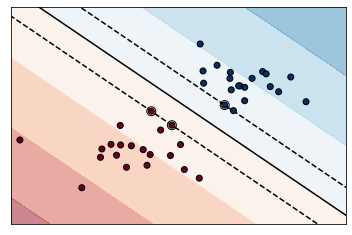

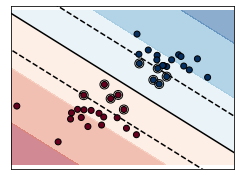

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

bankdata = pd.read_csv('data_banknote_authentication.csv', header=None,names=["column1", "column2", "column3", "column4" , "column5"])
bankdata.head()
bankdata.shape

X = bankdata.drop('column5', axis=1)
y = bankdata['column5']

from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y,test_size=0.8)

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# svclassifier = SVC(C=1,kernel='linear')
# svclassifier = SVC(C=0.01,kernel='linear'

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

# Plot data points and color using their class

color = [('black' if c == 0 else 'red') for c in y_train]
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=color)

# Create the hyperplane

w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - svclassifier.intercept_[0] / w[1]

# Plot the hyperplane

plt.plot(xx, yy)
(plt.axis('off'), )

# we create 40 separable points

np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2,
          2]]
Y = [0] * 20 + [1] * 20

# figure number

fignum = 1

# fit the model

for (name, penalty) in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane

    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - clf.intercept_[0] / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.

    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors='none',
        zorder=10,
        edgecolors='k',
        cmap=cm.get_cmap('RdBu'),
        )
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=Y,
        zorder=10,
        cmap=cm.get_cmap('RdBu'),
        edgecolors='k',
        )

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    (YY, XX) = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot

    plt.contourf(
        XX,
        YY,
        Z,
        cmap=cm.get_cmap('RdBu'),
        alpha=0.5,
        linestyles=['-'],
        )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()
